<a href="https://colab.research.google.com/github/neil-vqa/ARIMA-forecasting/blob/master/tuned_PH_avg_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import itertools
import warnings

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ph_tas.csv to ph_tas.csv


In [0]:
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('ph_tas.csv')
data_play = data['Temperature - (Celsius)']
tempr_data = data_play[:-100]
input = tempr_data.values

In [6]:
p=q=d=range(0,9)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(input, order=param)
        model_fit = model_arima.fit()
        print(param, model_fit.aic)
    except:
        continue

(0, 0, 0) 3239.269284891281
(0, 0, 1) 2473.144743699995
(0, 0, 3) 2031.5655531510708
(0, 0, 4) 2027.1045609170928
(0, 0, 5) 2018.7963585774644
(0, 0, 6) 2010.3558353995502
(0, 0, 7) 1997.4365046527248
(0, 1, 0) 2472.1014527043376
(0, 1, 1) 2415.8348304150995
(0, 1, 2) 2407.6559676883144
(0, 1, 3) 2079.5790315115514
(0, 1, 4) 2008.7449519907875
(0, 1, 5) 2008.1418984699421
(0, 1, 6) 1986.9610668363955
(0, 1, 7) 1956.174225508467
(0, 2, 0) 3066.167117943911
(0, 2, 1) 2480.3514592354477
(0, 2, 2) 2423.756846363365
(0, 2, 3) 2415.263581888388
(1, 0, 0) 2283.7271002814277
(1, 0, 1) 2155.1779527413564
(1, 0, 2) 2048.5271163124007
(1, 0, 3) 2030.467593224472
(1, 0, 4) 2031.1133087685164
(1, 0, 5) 2007.9040135312177
(1, 0, 6) 2005.1208462709487
(1, 0, 7) 1958.911596921764
(1, 0, 8) 1923.279508038483
(1, 1, 0) 2418.534113962209
(1, 1, 2) 2138.51018858031
(1, 1, 4) 2009.7219101931735
(1, 1, 5) 2005.039983787666
(1, 1, 6) 1944.3819966332005
(1, 1, 7) 1938.1151538683985
(1, 1, 8) 1928.179919013943

404, 405, 408, 506, 517, 604, 616, 708, 717, 804, 807

In [0]:
model_arima = ARIMA(input, order=(8,0,7))
model_fit = model_arima.fit()

In [0]:
predictions = model_fit.forecast(steps=12)
preds = predictions[0]

In [9]:
for pred in preds:
    print(pred)

25.706987333574677
25.65746524270071
25.327506142839418
24.761622731665238
24.422017795258007
24.732935306294056
25.504467147246277
26.33841438078918
26.558768972189533
26.31456324578876
25.773338334755767
25.59862529182822


In [0]:
temp_series = np.array(data_play[-100:-76])

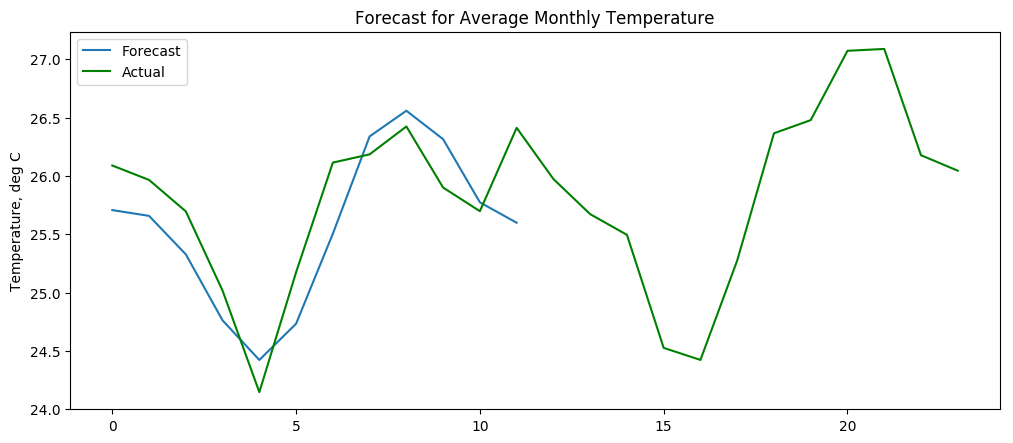

In [14]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(preds, label='Forecast')
plt.plot(temp_series, color='green', label='Actual')
plt.title('Forecast for Average Monthly Temperature')
plt.legend(loc='upper left')
plt.ylabel('Temperature, deg C')
plt.show()

In [17]:
mape = np.mean(np.abs(preds - temp_series[:12])/np.abs(temp_series[:12]))
mape

0.013668486736248974

In [18]:
accuracy = (1 - mape)*100
accuracy

98.6331513263751

In [20]:
corr = np.corrcoef(preds, temp_series[:12])[0,1]
corr

0.8373047987685014